<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 2. Geomorphology
## Gauss distribution

----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we apply simple integration methods to our **Gaussian distribution**.

As a first step, we import the `numpy`, the `matplotlib` library, and the `scipy` library to be generally available.
Note that from *scipy*, only the package `integrate` is imported.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

----
## Gauss distribution: probability function

We recall the definition of the classical **Gaussian** curve, given as probability:
$$
p_i(x) = {{1} \over {\sqrt{2\pi \sigma^2}}} e^{-{{(x-\mu)^2} \over {2\sigma^2}}}
$$
with 
- $\mu$ the **mean** for the distribution
- $\sigma$ the **standard deviation** for the distribution
- $x$ the data range

We first define mean and standard deviation, then the Gauss probability function as function:

In [6]:
# mean mu and standard deviation sigma
mu    = 2.
sigma = 1.

def gauss_probability(x,mu=2.,sigma=1.):
    # Gauss probability function y=p_i(x)
    y = 1/(sigma * np.sqrt(2*np.pi)) * np.exp( -(x-mu)**2 / (2*sigma**2) )
    return y

Next, we plot the Gauss probability function along with the 
- 1-$\sigma$
- 2-$\sigma$ 
- 3-$\sigma$ 

standard deviation bars. 

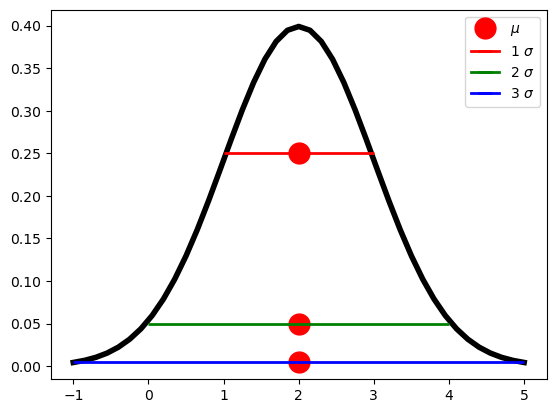

In [13]:


# plot function first for visualisation
x = np.linspace(-3*sigma+mu,3*sigma+mu,41)
y = gauss_probability(x,mu,sigma)
plt.plot(x,y,linewidth=4,color='black')
plt.plot(mu,0.25,linestyle='none',marker='o',markersize=15,color='red',label='$\mu$')
plt.errorbar(mu, 0.25, xerr=sigma,color='red',linewidth=2,label='1 $\sigma$')
plt.plot(mu,0.05,linestyle='none',marker='o',markersize=15,color='red')
plt.errorbar(mu, 0.05, xerr=2*sigma,color='green',linewidth=2,label='2 $\sigma$')
plt.plot(mu,0.005,linestyle='none',marker='o',markersize=15,color='red')
plt.errorbar(mu, 0.005, xerr=3*sigma,color='blue',linewidth=2,label='3 $\sigma$')
plt.legend()

----
## Integrate over Gaussian distribution

We have said, that the probabilities for a sample to be within the $\pm 1\sigma$, $\pm 2\sigma$,
or $\pm 3\sigma$ range is:

- Around 68.27 % of all points are within the $1 \sigma$ uncertainty.
- Around 95.45 % of all points are within the $2 \sigma$ uncertainty.
- Around 99.73 % of all points are within the $3 \sigma$ uncertainty.

Let's calculate these values. We just need to integrate the above function from
$x \in [-1 \sigma,+1 \sigma]$,
$x \in [-2 \sigma,+2 \sigma]$,
$x \in [-3 \sigma,+3 \sigma]$.

We use the **Gaussian quadrature** as integration method:

In [13]:
# perform numerical integration three times
onesigma   = integrate.quad(gauss_probability,-1*sigma+mu,1*sigma+mu)
twosigma   = integrate.quad(gauss_probability,-2*sigma+mu,2*sigma+mu)
threesigma = integrate.quad(gauss_probability,-3*sigma+mu,3*sigma+mu)
print ("%s %4.2f %s" % ('1-sigma: ',100*onesigma[0],'%'))
print ("%s %4.2f %s" % ('2-sigma: ',100*twosigma[0],'%'))
print ("%s %4.2f %s" % ('3-sigma: ',100*threesigma[0],'%'))

1-sigma:  68.27 %
2-sigma:  95.45 %
3-sigma:  99.73 %


Voila, there we are!